In [5]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.utils.class_weight import compute_class_weight

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', palette='pastel', rc={'figure.figsize':(15,10)})

In [3]:
data_path = '/home/jibeiroa/desercion_escolar_argentina/data/preprocessed/preprocessed_dataset.csv'
data = pd.read_csv(data_path)

In [4]:
data.columns.values

array(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04',
       'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH15', 'CH16',
       'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02E', 'PP02H', 'PP07I',
       'PP07H', 'PP04B1', 'DECINDR', 'T_VI', 'NIVEL_ED', 'V2_M',
       'REALIZADA', 'IV1', 'IV2', 'IV3', 'IV4', 'IV5', 'IV6', 'IV7',
       'IV8', 'IV9', 'IV10', 'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1',
       'II2', 'II3', 'II4_1', 'II4_2', 'II4_3', 'II7', 'II8', 'II9', 'V1',
       'V2', 'V21', 'V22', 'V3', 'V5', 'V6', 'V7', 'V8', 'V11', 'V12',
       'V13', 'V14', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'ITF', 'DECCFR',
       'REALIZADA_jefx', 'CH04_jefx', 'CH06_jefx', 'ESTADO_jefx',
       'NIVEL_ED_jefx', 'PP02E_jefx', 'CAT_OCUP_jefx', 'PP07I_jefx',
       'PP07H_jefx', 'PP04B1_jefx', 'REALIZADA_conyuge', 'CH04_conyuge',
       'ESTADO_conyuge', 'JEFE_TRABAJA', 'CONYUGE_TRABAJA', 'JEFA_MUJER',
       'HO

In [10]:
compute_class_weight(class_weight='balanced', classes=np.unique(data.DESERTO), y=data.DESERTO)

array([0.5812522 , 3.57683983])

In [11]:
np.unique(data.DESERTO)

array([0, 1])

In [17]:
n_samples = len(data.DESERTO)
n_classes = data.DESERTO.nunique()
balanced = n_samples / (n_classes * np.bincount(data.DESERTO))
weights = np.linspace(0., balanced)
class_weights = [{0: x[0], 1: x[1]} for x in weights]

In [18]:
balanced

array([0.5812522 , 3.57683983])

In [19]:
class_weights

[{0: 0.0, 1: 0.0},
 {0: 0.011862289762897773, 1: 0.07299673115999647},
 {0: 0.023724579525795545, 1: 0.14599346231999294},
 {0: 0.03558686928869332, 1: 0.2189901934799894},
 {0: 0.04744915905159109, 1: 0.2919869246399859},
 {0: 0.05931144881448886, 1: 0.3649836557999824},
 {0: 0.07117373857738664, 1: 0.4379803869599788},
 {0: 0.08303602834028441, 1: 0.5109771181199753},
 {0: 0.09489831810318218, 1: 0.5839738492799718},
 {0: 0.10676060786607995, 1: 0.6569705804399683},
 {0: 0.11862289762897772, 1: 0.7299673115999648},
 {0: 0.1304851873918755, 1: 0.8029640427599611},
 {0: 0.14234747715477328, 1: 0.8759607739199576},
 {0: 0.15420976691767105, 1: 0.9489575050799541},
 {0: 0.16607205668056882, 1: 1.0219542362399505},
 {0: 0.1779343464434666, 1: 1.0949509673999471},
 {0: 0.18979663620636436, 1: 1.1679476985599435},
 {0: 0.20165892596926213, 1: 1.24094442971994},
 {0: 0.2135212157321599, 1: 1.3139411608799365},
 {0: 0.22538350549505767, 1: 1.386937892039933},
 {0: 0.23724579525795544, 1: 1.45

# Correlación entre variables

<Axes: >

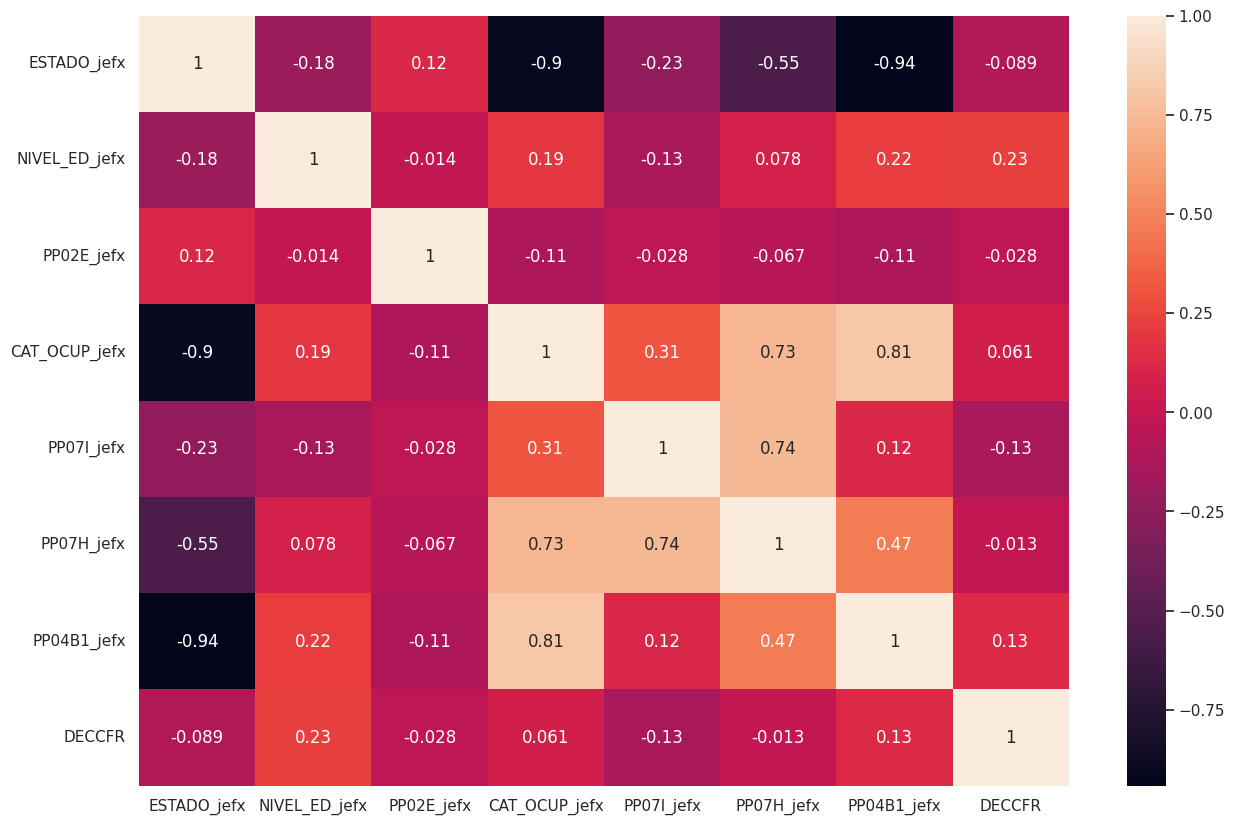

In [79]:
# jefx de hogar
sns.heatmap(data[['ESTADO_jefx', 'NIVEL_ED_jefx', 'PP02E_jefx', 'CAT_OCUP_jefx', 'PP07I_jefx', 'PP07H_jefx', 'PP04B1_jefx', 'DECCFR']].corr(), 
            annot=True)

In [24]:
# baño
data[['IV8', 'II9']].value_counts(dropna=False)

IV8  II9
1.0  1.0    12976
     2.0      129
     3.0       95
2.0  4.0       16
1.0  0.0        4
dtype: int64

<Axes: >

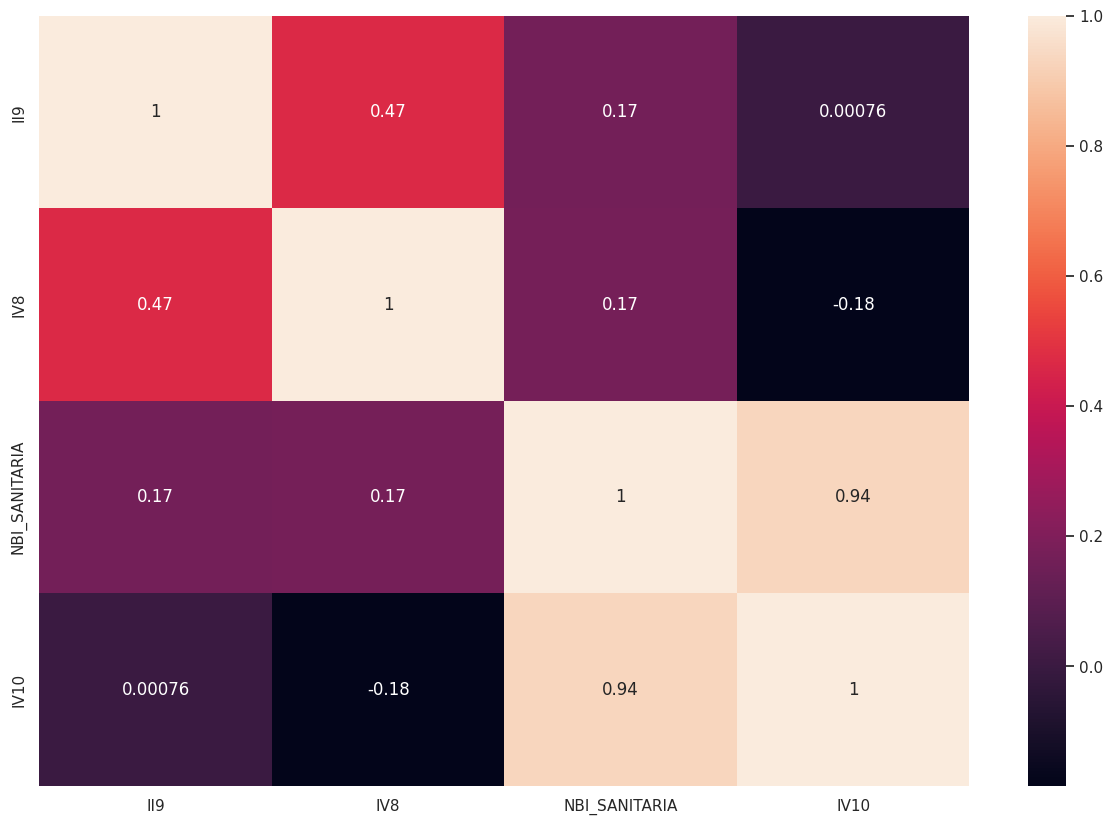

In [81]:
# sanitario
sns.heatmap(data[['II9', 'IV8', 'NBI_SANITARIA', 'IV10']].corr(),
            annot=True)

<Axes: >

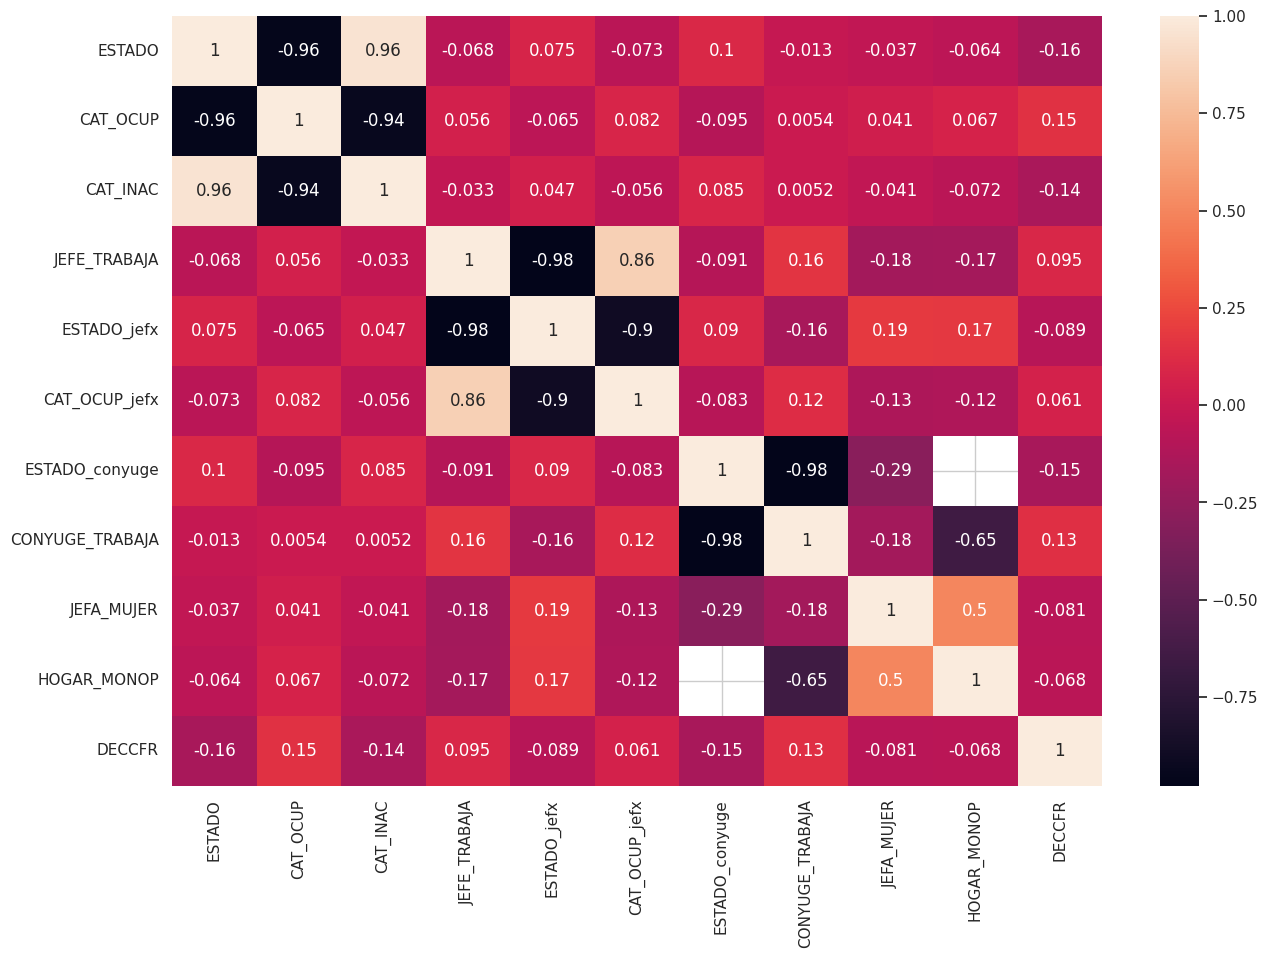

In [78]:
# trabajo
sns.heatmap(data[['ESTADO', 'CAT_OCUP', 'CAT_INAC', 'JEFE_TRABAJA', 'ESTADO_jefx', 'CAT_OCUP_jefx', 
                  'ESTADO_conyuge', 'CONYUGE_TRABAJA', 'JEFA_MUJER', 'HOGAR_MONOP', 'DECCFR']].corr(),
            annot=True)

In [41]:
data[['JEFE_TRABAJA', 'ESTADO_jefx']].value_counts(ascending=True)

JEFE_TRABAJA  ESTADO_jefx
0             0.0               9
              2.0             374
              3.0            2967
1             1.0            9870
dtype: int64

<Axes: >

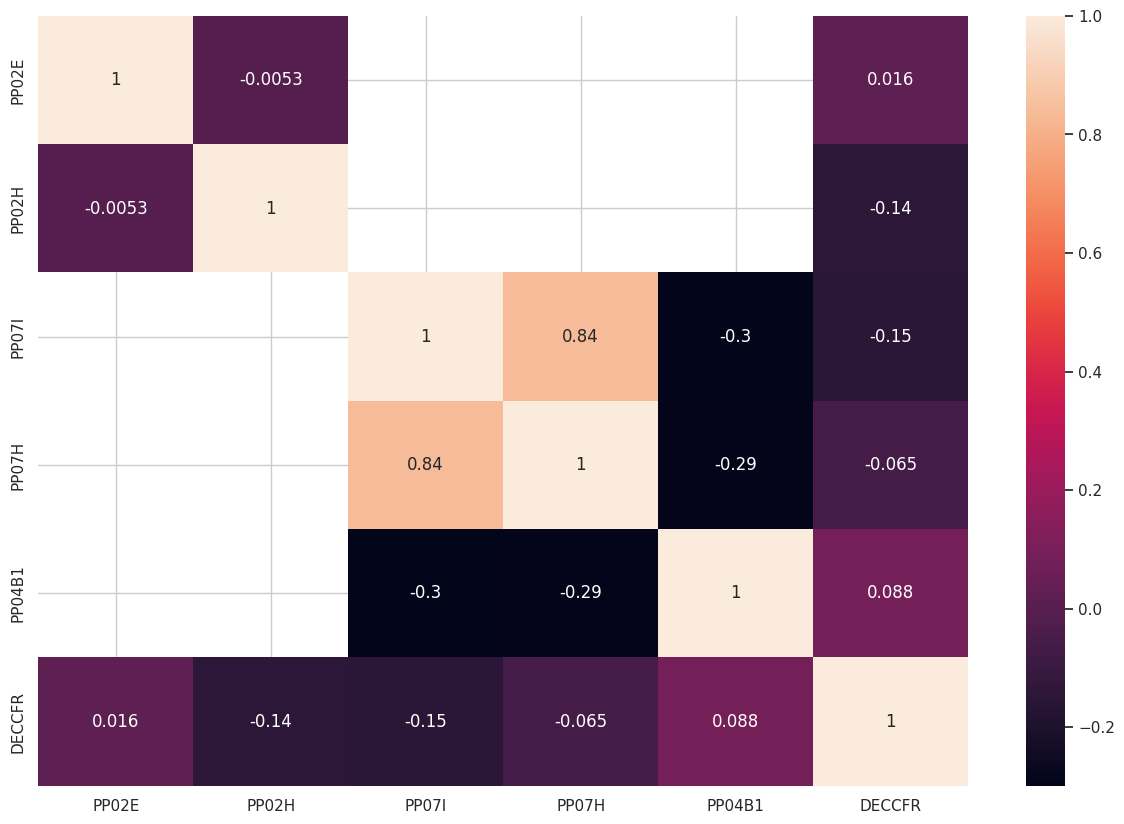

In [77]:
# pps
sns.heatmap(data[['PP02E', 'PP02H', 'PP07I', 'PP07H', 'PP04B1', 'DECCFR']].corr(), 
            annot=True)

In [47]:
data.loc[(data.PP07H == 2) & (data.PP07I == 1), 'PP07H'] = 1
data[['PP07I', 'PP07H']].value_counts()

PP07I  PP07H
2.0    2.0      1013
0.0    1.0       999
       0.0       603
1.0    1.0       130
0.0    2.0        12
9.0    2.0         2
dtype: int64

In [53]:
data[['ESTADO_jefx', 'PP04B1_jefx']].value_counts()

ESTADO_jefx  PP04B1_jefx
1.0          2.0            9078
3.0          0.0            2967
1.0          1.0             792
2.0          0.0             374
0.0          0.0               9
dtype: int64

<Axes: >

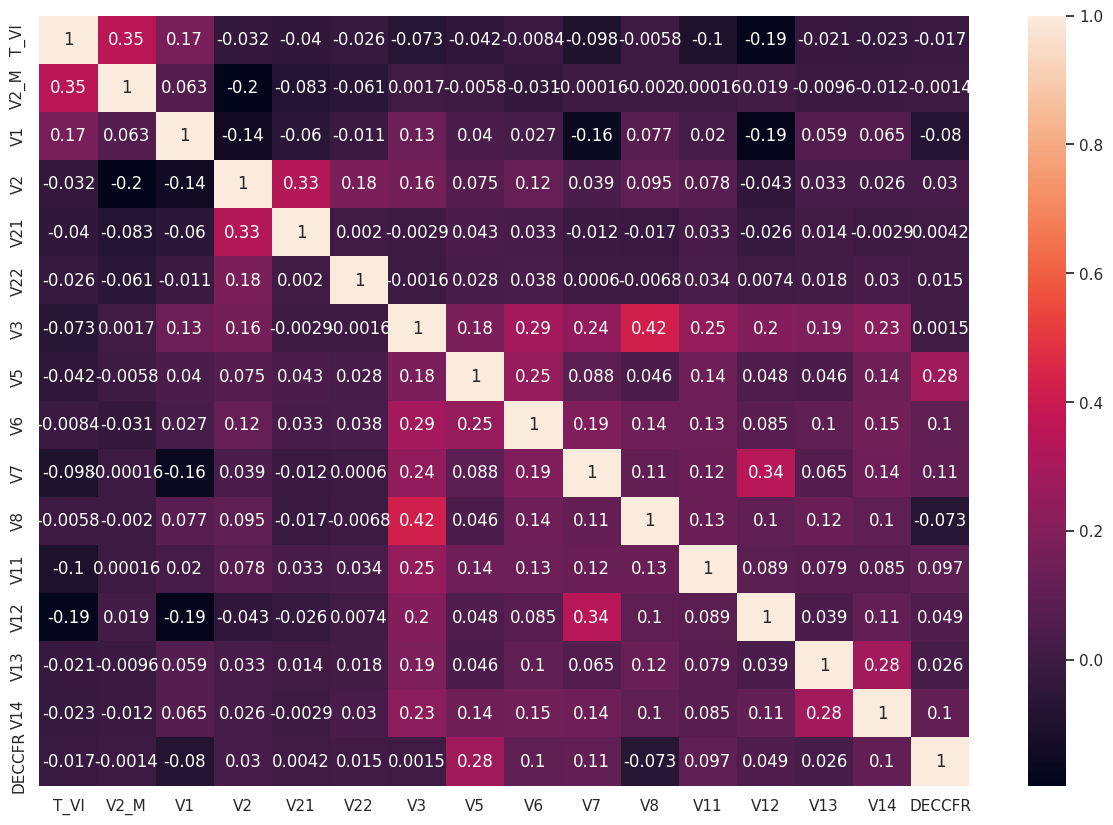

In [76]:
# ingresos
sns.heatmap(data[['T_VI', 'V2_M', 'V1', 'V2', 'V21', 'V22', 'V3', 'V5', 'V6', 'V7', 'V8', 'V11', 'V12', 'V13', 'V14', 'DECCFR']].corr(), 
            annot=True)

<Axes: >

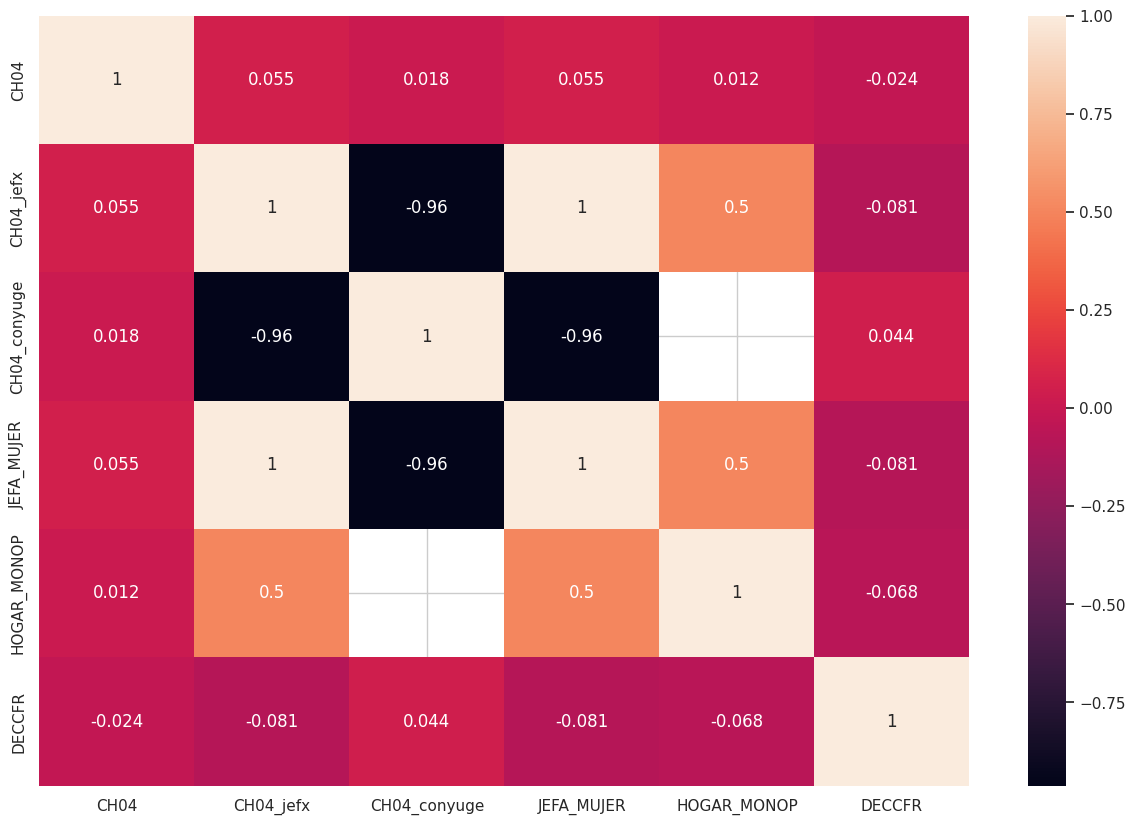

In [75]:
# sexo
sns.heatmap(data[['CH04', 'CH04_jefx', 'CH04_conyuge', 'JEFA_MUJER', 'HOGAR_MONOP', 'DECCFR']].corr(), 
            annot=True)

<Axes: >

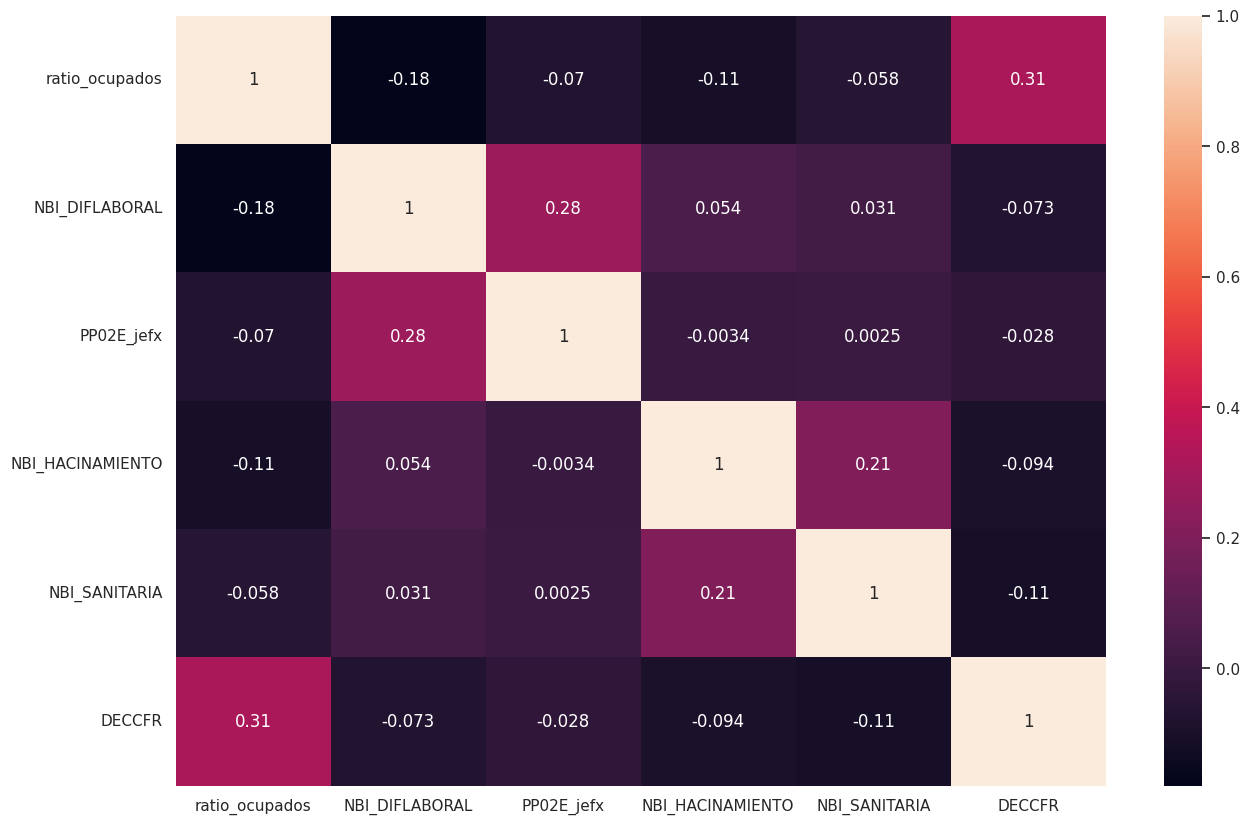

In [90]:
# NBIs
sns.heatmap(data[['ratio_ocupados',
                  'NBI_DIFLABORAL', 'PP02E_jefx', 'NBI_HACINAMIENTO', 'NBI_SANITARIA', 
                  'DECCFR']].corr(), 
            annot=True)

In [91]:
data[['REALIZADA', 'H15']].value_counts()

REALIZADA  H15
1.0        1.0    13213
           2.0        7
dtype: int64

In [64]:
# decil familiar de ingresos, ~20% no declara ingresos
data.DECCFR.value_counts(normalize=True)

12.0    0.197882
1.0     0.139410
2.0     0.136384
3.0     0.131543
4.0     0.091755
5.0     0.076399
6.0     0.066566
7.0     0.058169
8.0     0.046445
9.0     0.033737
10.0    0.019365
0.0     0.002345
Name: DECCFR, dtype: float64

In [24]:
data.DECCFR.replace({12.0: np.nan}, inplace=True)
data.DECCFR.value_counts(normalize=True, dropna=False)

NaN     0.197882
1.0     0.139410
2.0     0.136384
3.0     0.131543
4.0     0.091755
5.0     0.076399
6.0     0.066566
7.0     0.058169
8.0     0.046445
9.0     0.033737
10.0    0.019365
0.0     0.002345
Name: DECCFR, dtype: float64

In [25]:
imputer = KNNImputer(n_neighbors=1, missing_values=np.nan, add_indicator=True)

In [41]:
cols = [
        'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH15', 'CH16', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02E', 'PP02H', 'PP07I', 'PP07H', 'PP04B1', 'DECCFR', 'T_VI', 'NIVEL_ED', 'V2_M', 'NBI_SUBSISTENCIA', 'NBI_COBERTURA_PREVISIONAL', 'NBI_DIFLABORAL',
        'NBI_HACINAMIENTO', 'NBI_SANITARIA', 'NBI_TENENCIA',
        'NBI_TRABAJO_PRECARIO', 'NBI_VIVIENDA', 'NBI_ZONA_VULNERABLE', 'HOGAR_MONOP', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'DESERTO', 'NIVEL_ED_jefx', 'JEFA_MUJER', 'ratio_ocupados', 'JEFE_TRABAJA'
]

In [42]:
imputed = imputer.fit_transform(data[cols])

In [43]:
columnas = imputer.get_feature_names_out()

In [44]:
df_imputed = pd.DataFrame(imputed, columns=columnas)

In [45]:
df_imputed.columns

Index(['CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH15',
       'CH16', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02E', 'PP02H', 'PP07I',
       'PP07H', 'PP04B1', 'DECCFR', 'T_VI', 'NIVEL_ED', 'V2_M',
       'NBI_SUBSISTENCIA', 'NBI_COBERTURA_PREVISIONAL', 'NBI_DIFLABORAL',
       'NBI_HACINAMIENTO', 'NBI_SANITARIA', 'NBI_TENENCIA',
       'NBI_TRABAJO_PRECARIO', 'NBI_VIVIENDA', 'NBI_ZONA_VULNERABLE',
       'HOGAR_MONOP', 'IX_TOT', 'IX_MEN10', 'IX_MAYEQ10', 'DESERTO',
       'NIVEL_ED_jefx', 'JEFA_MUJER', 'ratio_ocupados', 'JEFE_TRABAJA',
       'missingindicator_PP07I', 'missingindicator_PP07H',
       'missingindicator_PP04B1', 'missingindicator_DECCFR'],
      dtype='object')

In [52]:
df_imputed.DECCFR.value_counts(normalize=True)

2.0     0.164372
3.0     0.162632
1.0     0.161952
4.0     0.115961
5.0     0.095613
6.0     0.084720
7.0     0.075492
8.0     0.061800
9.0     0.046596
10.0    0.026021
0.0     0.004841
Name: DECCFR, dtype: float64

In [48]:
data.DECCFR.value_counts(normalize=True, dropna=False)

NaN     0.197882
1.0     0.139410
2.0     0.136384
3.0     0.131543
4.0     0.091755
5.0     0.076399
6.0     0.066566
7.0     0.058169
8.0     0.046445
9.0     0.033737
10.0    0.019365
0.0     0.002345
Name: DECCFR, dtype: float64